# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [6]:
temp = pd.read_csv('./Temp_states.csv')

#### Print `temp`

In [8]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [10]:
data_types = temp.dtypes
print(data_types)

City            object
State           object
Temperature    float64
dtype: object


#### Selecciona las filas en las que el estado es New York

In [12]:
new_york_data = temp[temp['State'] == 'New York']
print(new_york_data.head())

      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [14]:
mean_temperature_ny = new_york_data['Temperature'].mean()
print(f"La temperatura media de las ciudades de NY es: {mean_temperature_ny:.2f}")

La temperatura media de las ciudades de NY es: 10.74


#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [16]:
cities_states_15 = temp[temp['Temperature'] > 15][['City', 'State']]
print(cities_states_15)


       City        State
0       NYC     New York
3  Hartford  Connecticut
5    Treton   New Jersey
6    Newark   New Jersey


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [18]:
cities_15 = temp[temp['Temperature'] > 15]['City']
print(cities_15)

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object


#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [20]:
cities_15_20 = temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)][['City','Temperature']]
print(cities_15_20)

       City  Temperature
0       NYC    19.444444
3  Hartford    17.222222


In [21]:
#temp['State'].value_counts()

#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [23]:
temperature_stats = temp.groupby('State')['Temperature'].agg(['mean','std']).reset_index()
print(temperature_stats)

         State       mean       std
0  Connecticut  15.833333  1.964186
1   New Jersey  21.111111  1.571348
2     New York  10.740741  8.133404


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [26]:
employee = pd.read_csv('./Employee.csv')
print(employee)

     Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70


#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [28]:
print(employee.dtypes)

print(employee.info())

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes
None


#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

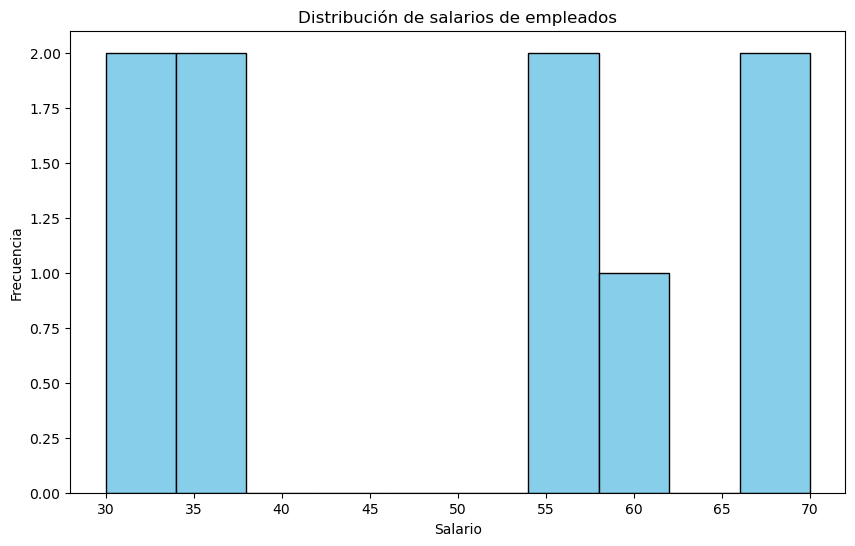

In [30]:
plt.figure(figsize=(10,6))
plt.hist(employee['Salary'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de salarios de empleados')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()

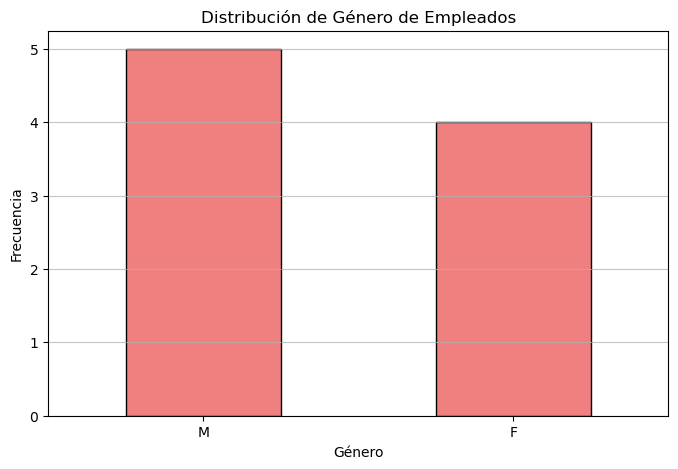

In [31]:
gender_counts = employee['Gender'].value_counts()

plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Distribución de Género de Empleados')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

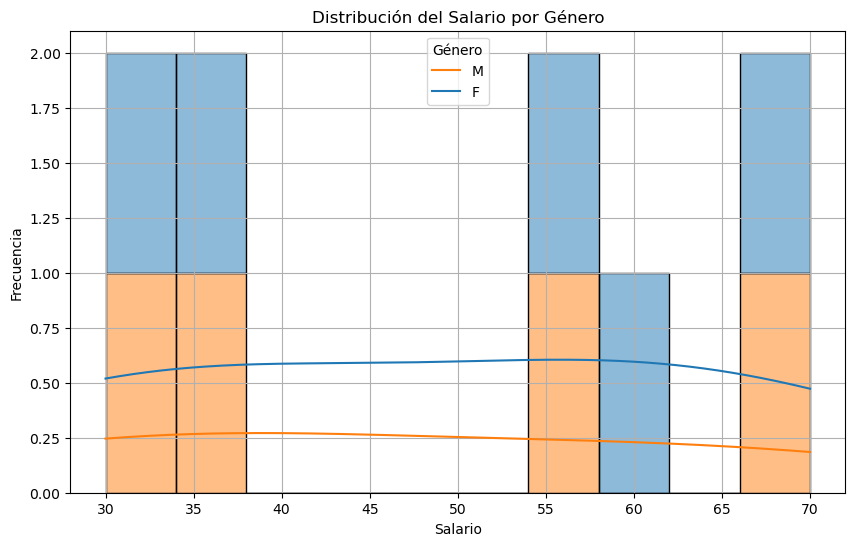

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=employee, x='Salary', hue='Gender', multiple='stack', bins=10, kde=True)

# Personalización del gráfico
plt.title("Distribución del Salario por Género")
plt.xlabel("Salario")
plt.ylabel("Frecuencia")

# Añadir leyenda manualmente
plt.legend(title='Género', labels=employee['Gender'].unique())
plt.grid(True)

# Mostrar el gráfico
plt.show()


#### ¿Cuál es el salario medio en esta empresa?

In [34]:
mean_salary = employee['Salary'].mean()
print(f"El salario medio en la empresa es: {mean_salary:.2f}")

El salario medio en la empresa es: 48.89


#### ¿Cuál es el salario más alto?

In [36]:
max_salary = employee['Salary'].max()
print(f"El salario más alto en la empresa es: {max_salary}")

El salario más alto en la empresa es: 70


#### ¿Cuál es el salario más bajo?

In [38]:
min_salary = employee['Salary'].min()
print(f"El salario más bajo en la empresa es: {min_salary}")

El salario más bajo en la empresa es: 30


#### ¿Quiénes son los empleados con el salario más bajo?

In [40]:
employees_min_salary = employee[employee['Salary'] == employee['Salary'].min()]
print(employees_min_salary)

    Name Department Education Gender    Title  Years  Salary
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [42]:
info_david = employee[employee['Name'] == 'David']
print(info_david)

    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### ¿Podría dar sólo el sueldo de David?

In [44]:
salary_david = employee.loc[employee['Name'] == 'David', ['Name', 'Salary']]
print(salary_david)

    Name  Salary
2  David      30


#### Printea todas las líneas en las que el cargo es asociado

In [46]:
title_associate = employee[employee['Title'] == 'associate']
print(title_associate)

     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [48]:
print(employee.head(3))

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


In [49]:
print(employee[:3])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [51]:
title_associate = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)][['Name','Title','Salary']]
print(title_associate)

    Name      Title  Salary
7  Pedro  associate      60


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [53]:
mean_salary = employee.groupby('Years')['Salary'].mean()
print(mean_salary)

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64


#### ¿Cuál es el salario medio por título?

In [55]:
mean_salary_title = employee.groupby('Title')['Salary'].mean()
print(mean_salary_title)

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

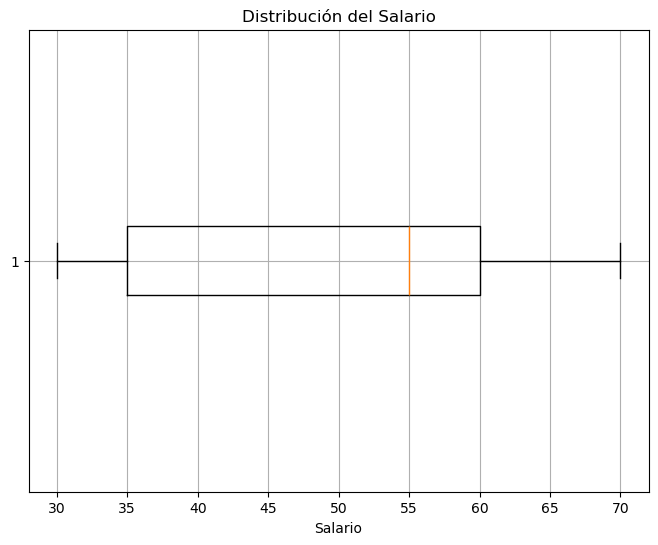

In [57]:
plt.figure(figsize=(8, 6))
plt.boxplot(employee['Salary'], vert=False)
plt.title('Distribución del Salario')
plt.xlabel('Salario')
plt.grid(True)
plt.show()

In [58]:
Q1 = employee['Salary'].quantile(0.25)
print(f"Primer cuartil (Q1): {Q1}")

Primer cuartil (Q1): 35.0


In [59]:
Q3 = employee['Salary'].quantile(0.75)
print(f"Tercer cuartil (Q3): {Q3}")

Tercer cuartil (Q3): 60.0


#### ¿Es diferente el salario medio por género?

In [61]:
salary_by_gender = employee.groupby('Gender')['Salary'].mean()
print(salary_by_gender)

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64


#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [70]:
result = employee.groupby('Department')[['Salary', 'Years']].agg(['min', 'mean', 'max'])
print(result)

           Salary            Years              
              min   mean max   min      mean max
Department                                      
HR             30  45.00  70     2  4.666667   8
IT             30  48.75  70     1  4.500000   8
Sales          55  55.00  55     2  2.500000   3


### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [75]:
result = employee.groupby('Department')['Salary'].agg(
    diferencia=lambda x: x.max() - x.min(),
    desviacion_estandar='std'
)
result

,diferencia,desviacion_estandar
Department,,
HR,40,21.794495
IT,40,19.311050
Sales,0,0.000000


# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [88]:
orders = pd.read_csv('./Orders.csv')
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [84]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [86]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


#### ¿Cuál es el precio medio de compra?

In [106]:
precio_medio_compra = orders['amount_spent'].mean()
print(f"El precio medio de compra es:{precio_medio_compra:.2f} €")

El precio medio de compra es:22.39 €


#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [112]:
min_precio_compra = orders['amount_spent'].min()
print(f"El precio más bajo de compra es:{min_precio_compra:.2f} €")

El precio más bajo de compra es:0.00 €


In [110]:
max_precio_compra = orders['amount_spent'].max()
print(f"El precio más alto de compra es:{max_precio_compra:.2f} €")

El precio más alto de compra es:168469.60 €


#### Seleccione todos los clientes que tenemos en España

In [143]:
clientes_españa = orders[orders['Country'] == 'Spain']
clientes_españa

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [151]:
clientes_por_pais = orders['Country'].value_counts()
numero_clientes_espana = clientes_por_pais.get('Spain', 0)
print(f"Número de clientes en España: {numero_clientes_espana}")

Número de clientes en España: 2485


#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [156]:
articulos_cliente = orders.groupby('CustomerID')['Quantity'].sum()
cliente_mas_50 = articulos_cliente[articulos_cliente > 50]
cliente_mas_50

CustomerID
12346    74215
12347     2458
12348     2341
12349      631
12350      197
         ...  
18278       66
18281       54
18282      103
18283     1397
18287     1586
Name: Quantity, Length: 4091, dtype: int64

#### Selecciona pedidos de España superiores a 50 artículos

In [164]:
pedidos_españa = orders[orders['Country'] == 'Spain']
total_articulos_españa = pedidos_españa.groupby('InvoiceNo')['Quantity'].sum()
pedidos_mas_50_españa = total_articulos_españa[total_articulos_españa > 50]
pedidos_mas_50_españa

InvoiceNo
536944    400
538095     67
538525    300
539351    100
540469    630
         ... 
578321    920
578339     77
579503    117
580955    182
581193     92
Name: Quantity, Length: 80, dtype: int64

#### Seleccionar todos los pedidos gratuitos

In [170]:
pedidos_0 = orders[orders['amount_spent'] == 0]
pedidos_gratuitos = pedidos_0.groupby('InvoiceNo')['amount_spent'].sum()
pedidos_gratuitos

InvoiceNo
537197    0.0
539263    0.0
539722    0.0
540372    0.0
541109    0.0
543599    0.0
547417    0.0
548318    0.0
548871    0.0
550188    0.0
553000    0.0
554037    0.0
561284    0.0
561669    0.0
561916    0.0
562973    0.0
564651    0.0
568158    0.0
568384    0.0
569716    0.0
571035    0.0
572893    0.0
574138    0.0
574175    0.0
574252    0.0
574469    0.0
574879    0.0
574920    0.0
575579    0.0
577129    0.0
577168    0.0
577314    0.0
577696    0.0
578841    0.0
Name: amount_spent, dtype: float64

#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [178]:
pedidos_lunch_bag = orders[orders['Description'].str.contains('lunch bag.*')]

pedidos_lunch_bag


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [182]:
pedidos_2011_lunch_bag = orders[(orders['year'] == 2011) & (orders['Description'].str.contains('lunch bag,*'))]
pedidos_2011_lunch_bag

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Muestra la distribución de frecuencias del importe gastado en España.

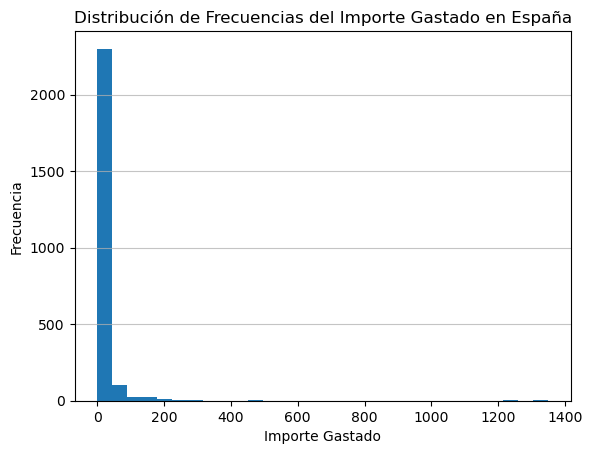

In [195]:
pedidos_españa = orders[orders['Country'] == 'Spain']
distribucion_frecuencias = pedidos_españa['amount_spent'].value_counts()
distribucion_frecuencias

plt.hist(pedidos_españa['amount_spent'], bins=30)
plt.title('Distribución de Frecuencias del Importe Gastado en España')
plt.xlabel('Importe Gastado')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Seleccione todos los pedidos realizados en el mes de agosto

In [200]:
pedidos_agosto = orders[orders['month'] == 8]
pedidos_agosto

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [204]:
pedidos_agosto_pais = pedidos_agosto['Country'].value_counts()
pedidos_agosto_pais

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64

#### ¿Cuál es el gasto medio por país?

In [207]:
gasto_medio_pais = orders.groupby('Country')['amount_spent'].mean()
gasto_medio_pais

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### ¿Cuál es el artículo más caro?

In [225]:
precio_unitario_mas_caro = orders['UnitPrice'].max()
articulo_mas_caro = orders[orders['UnitPrice'] == precio_unitario_mas_caro]
print(articulo_mas_caro[['Description','UnitPrice']])

       Description  UnitPrice
118352     postage    8142.75


#### ¿Cuál fue la cantidad media gastada al año?

In [227]:
gasto_medio_año = orders.groupby('year')['amount_spent'].mean()
gasto_medio_año

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64